In [2]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.fft as fft


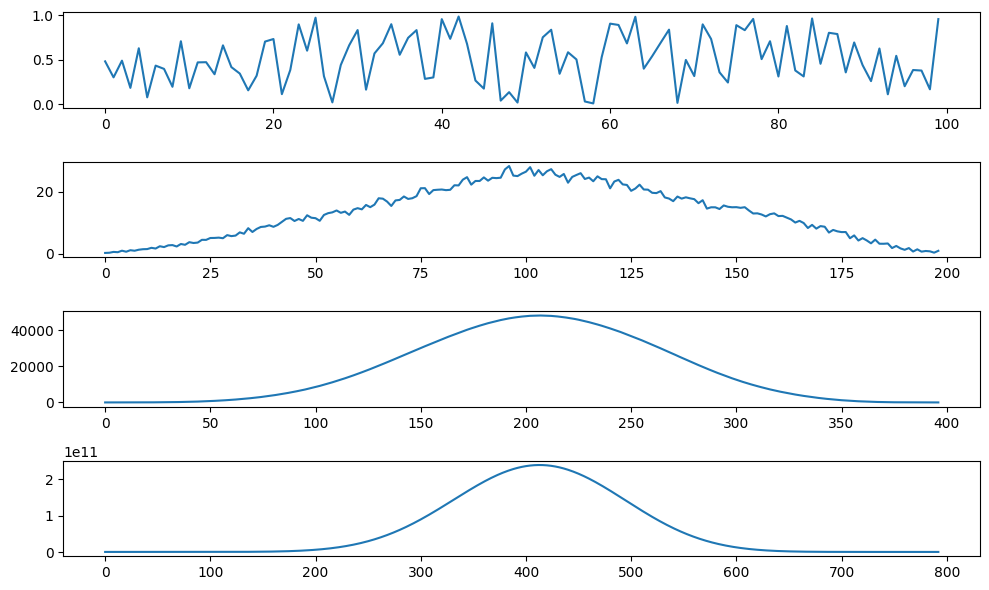

In [24]:
# 1. Generati un vector x[n] aleator de dimensiune N = 100. Calculati iteratia
# x ← x ∗ x de trei ori. Afisati cele patru grafice. Ce observati?

x = np.random.rand(100)
plt.figure(figsize=(10, 6))
plt.subplot(4,1,1)
plt.plot(x)
for i in range(3):
    x = np.convolve(x,x)
    plt.subplot(4,1,i+2)
    plt.plot(x)
plt.tight_layout()

In [52]:
# 2. Vi se dau dou˘a polinoame p(x) s, i q(x) cu grad maxim N generate aleator
# cu coeficient, i ˆıntregi. Calculat, i produsul lor r(x) = p(x)q(x) folosing
# convolut, ia: folosind ˆınmult, irea polinoamelor direct˘a s, i apoi folosind fft.
gradn = 3

p = np.random.randint(low = 1, high = 10, size = gradn + 1)
q = np.random.randint(low = 1, high = 10, size = gradn + 1)
print('Inmultirea directa')
# print(p)
# print(q)
pq = np.convolve(p,q)
print(pq)
print('Inmultirea folosind fft')
p = np.append(p,np.zeros(gradn))
q = np.append(q,np.zeros(gradn)) 
# print(p)
# print(q)
p_f = fft.fft(p)
q_f = fft.fft(q)
pq_f = p_f * q_f
print(np.real(fft.ifft(pq_f)))   

Inmultirea directa
[16 18 81 97 49 21  6]
Inmultirea folosind fft
[16. 18. 81. 97. 49. 21.  6.]


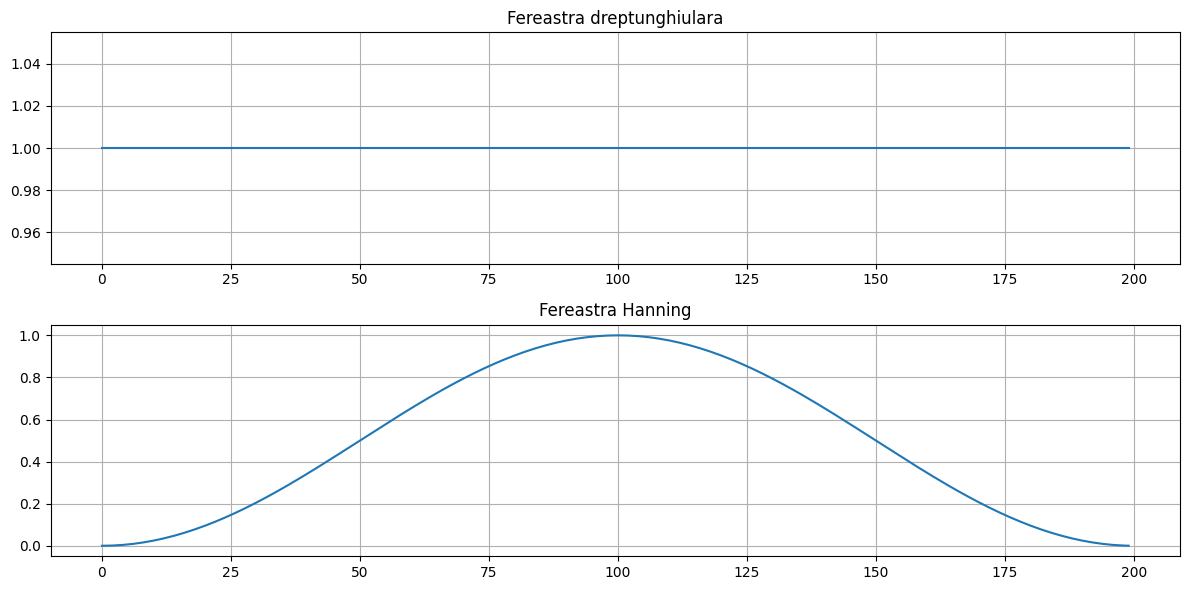

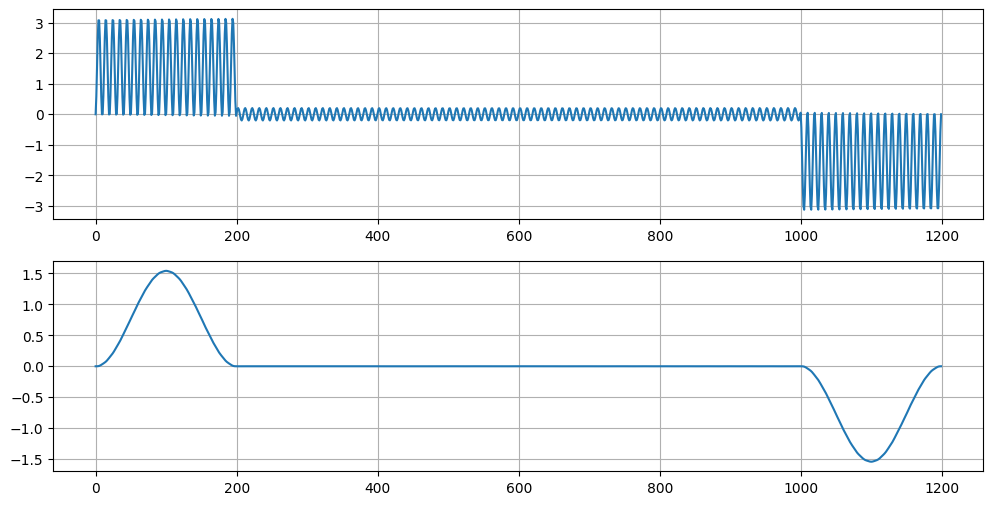

In [74]:
def fereastra_dreptunghiulara(dimensiune):
    f_dreptunghiulara = np.ones(dimensiune)
    return f_dreptunghiulara
    
def fereastra_Hanning(dimensiune):
    n =  np.arange(0,dimensiune,1)
    f_Hanning = 0.5 * (1- np.cos(2*np.pi*n/dimensiune))
    return f_Hanning
    

fs = 1000
f = 100
A = 1
t = np.linspace(0, 1, fs)
sinusoida = A*np.sin(2*np.pi*f*t)

dimensiune =  200

f_d = fereastra_dreptunghiulara(dimensiune)
f_H = fereastra_Hanning(dimensiune)

plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.title("Fereastra dreptunghiulara")
plt.plot(f_d)
plt.grid(True)
plt.subplot(2,1,2)
plt.title("Fereastra Hanning")
plt.plot(f_H)
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.title("Convolutie cu fereastra dreptunghiulara")
plt.plot(np.convolve(f_d, sinusoida))
plt.grid(True)
plt.subplot(2,1,2)
plt.title("Convolutie cu fereastra Hanning")
plt.plot(np.convolve(f_H, sinusoida))
plt.grid(True)